In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading data

In [2]:
state_minwage_df = pd.read_excel("state_min_wage_rates.xlsx")
state_minwage_df.head()

,State or other,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,jurisdiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Federal (FLSA),7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
2,Alabama,...,...,...,...,...,...,...,...,...,...,...
3,Alaska,7.75,8.75,9.75,9.8,9.84,10.19,10.19,10.34,10.34,10.85,11.73
4,Arizona,7.9,8.05,8.05,10,10.5,12,12,12.15,12.8,13.85,14.35


In [3]:
# dropping rows that wont be used
state_minwage_df.drop(0, inplace=True)

In [4]:
state_minwage_df.head(10)

,State or other,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Federal (FLSA),7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
2,Alabama,...,...,...,...,...,...,...,...,...,...,...
3,Alaska,7.75,8.75,9.75,9.8,9.84,10.19,10.19,10.34,10.34,10.85,11.73
4,Arizona,7.9,8.05,8.05,10,10.5,12,12,12.15,12.8,13.85,14.35
5,Arkansas,6.25[c],7.50[c],8.00[c],8.50[c],8.50[c],9.25[c],10.00[c],11,11,11,11
6,California,9,9,10,10,11,12,12,13,14,15.5,16
7,Colorado,8,8.23,8.31,9.3,10.2,12,12.02,12.32,12.56,13.65,14.42
8,Connecticut,8.7,9.15,9.6,10.1,10.1,11,12,13,14,15,15.69
9,Delaware,7.75,8.25,8.25,8.25,8.25,9.25,9.25,9.25,10.5,11.75,13.25
10,Florida,7.93,8.05,8.05,8.1,8.25,8.56,8.56,10,10,12,12


In [5]:
state_minwage_df.columns

Index(['State or other',             2014,             2015,             2016,
                   2017,             2018,             2019,             2020,
                   2021,             2022,             2023,             2024],
      dtype='object')

### control state selection

In [6]:
state_minwage_df[2024] = pd.to_numeric(state_minwage_df[2024], errors="coerce")
state_minwage_df[2014] = pd.to_numeric(state_minwage_df[2014], errors="coerce")
# some values are .., so we coerce
state_minwage_df[state_minwage_df[2024] < 8]

,State or other,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Federal (FLSA),7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
13,Idaho,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
16,Iowa,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
17,Kansas,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
18,Kentucky,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
30,New Hampshire,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
34,North Carolina,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
35,North Dakota,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
39,Pennsylvania,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
44,Texas,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25


> So I think these will be our control states, since they havent made any changes

### treatment state selection

In [7]:
state_minwage_df[state_minwage_df[2024] > 12]

,State or other,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
4,Arizona,7.90,8.05,8.05,10,10.5,12,12,12.15,12.8,13.85,14.35
6,California,9.00,9,10,10,11,12,12,13,14,15.5,16.00
7,Colorado,8.00,8.23,8.31,9.3,10.2,12,12.02,12.32,12.56,13.65,14.42
8,Connecticut,8.70,9.15,9.6,10.1,10.1,11,12,13,14,15,15.69
9,Delaware,7.75,8.25,8.25,8.25,8.25,9.25,9.25,9.25,10.5,11.75,13.25
12,Hawaii,7.25,7.75,8.5,9.25,10.1,10.1,10.1,10.1,12,12,14.00
20,Maine,7.50,7.5,7.5,9,10,12,12,12.15,12.75,13.8,14.15
21,Maryland,7.25,8.25,8.75,8.75,10.1,11,11,11.75,12.5,13.25,15.00
22,Massachusetts,8.00,9,10,11,11,12.75,12.75,13.5,14.25,15,15.00
26,Missouri,7.50,7.65,7.65,7.7,7.85,9.45,9.45,10.3,11.15,12,12.30


> maybe it would be best to observe the states who also start at around $7.25

> Possible Treatment States: Arizona, Delaware, Hawaii,  Maine, Maryland, New Jersey

In [8]:
state_minwage_df[state_minwage_df["State or other"] == "Florida"]

,State or other,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
10,Florida,7.93,8.05,8.05,8.1,8.25,8.56,8.56,10,10,12,12.0


# State gdp data loading

In [9]:
# CONTROLS
kansas = pd.read_csv("./state_summarydata/control/kansas.csv")
kentucky = pd.read_csv("./state_summarydata/control/kentucky.csv")
newhampshire = pd.read_csv("./state_summarydata/control/newhampshire.csv")
northcarolina = pd.read_csv("./state_summarydata/control/northcarolina.csv")
pennsylvania = pd.read_csv("./state_summarydata/control/pennsylvania.csv")
texas = pd.read_csv("./state_summarydata/control/texas.csv")
utah = pd.read_csv("./state_summarydata/control/utah.csv")
wisconsin = pd.read_csv("./state_summarydata/control/wisconsin.csv")
control_df = pd.concat(
    [
        kansas,
        kentucky,
        newhampshire,
        northcarolina,
        pennsylvania,
        texas,
        utah,
        wisconsin,
    ],
    ignore_index=True,
)

control_df.tail()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
115,"""55000""",Wisconsin,3,SASUMMARY,11,...,Per capita disposable personal income 7/,Dollars,23210,23981,...,40512.000,40985.000,42755.00,44955.000,46369.000,49613.000,53747.000,53817.000,57640.000,60098
116,"""55000""",Wisconsin,3,SASUMMARY,12,...,Per capita personal consumption expenditures ...,Dollars,20564,21823,...,36628.000,37575.000,39052.00,40430.000,41504.000,40496.000,45690.000,49930.000,52593.000,(NA)
117,"""55000""",Wisconsin,3,SASUMMARY,13,...,Regional price parities (RPPs) 9/,Index,(NA),(NA),...,93.314,93.234,93.54,93.951,94.472,92.665,93.293,92.416,93.097,(NA)
118,"""55000""",Wisconsin,3,SASUMMARY,14,...,Implicit regional price deflator 10/,Index,(NA),(NA),...,90.794,91.634,93.54,95.874,97.787,96.966,101.663,107.304,112.174,(NA)
119,"""55000""",Wisconsin,3,SASUMMARY,15,...,Total employment (number of jobs),Number of jobs,3287793,3350388,...,3624473.000,3657732.000,3678859.00,3721096.000,3717587.000,3580658.000,3682359.000,3775679.000,3855150.000,(NA)


In [ ]:
# TREATMENT
arizona = pd.read_csv("./state_summarydata/treatment/arizona.csv")
delaware = pd.read_csv("./state_summarydata/treatment/delaware.csv")
hawaii = pd.read_csv("./state_summarydata/treatment/hawaii.csv")
maine = pd.read_csv("./state_summarydata/treatment/maine.csv")
maryland = pd.read_csv("./state_summarydata/treatment/maryland.csv")
newjersey = pd.read_csv("./state_summarydata/treatment/newjersy.csv")

treated_df = pd.concat(
    [arizona, delaware, hawaii, maine, maryland, newjersey],
    ignore_index=True,
)

treated_df.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1998,1999,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,"""04000""",Arizona,6,SASUMMARY,1,...,Real GDP (millions of chained 2017 dollars) 1/,Millions of chained 2017 dollars,197492.1,214293.9,...,308582.8,319008.4,333099.0,346398.3,359576.7,365027.7,395035.9,410228.4,422399.6,433763.2
1,"""04000""",Arizona,6,SASUMMARY,2,...,Real personal income (millions of constant (2...,Millions of constant 2017 dollars,(NA),(NA),...,281347.5,289273.8,304434.3,318218.3,333868.0,361266.1,394399.4,374592.8,381769.1,(NA)
2,"""04000""",Arizona,6,SASUMMARY,3,...,Real PCE (millions of constant (2017) dollars...,Millions of constant 2017 dollars,(NA),(NA),...,246519.2,251483.4,264659.3,275644.2,283289.2,281220.9,318965.7,321902.1,328923.0,(NA)
3,"""04000""",Arizona,6,SASUMMARY,4,...,Gross domestic product (GDP),Millions of current dollars,144393.2,156442.1,...,298942.2,313787.1,333099.0,353671.0,375376.7,388956.7,436778.6,484052.2,522767.2,552167.0
4,"""04000""",Arizona,6,SASUMMARY,5,...,Personal income,Millions of current dollars,117835.0,124922.3,...,267474.1,279696.7,297261.5,315459.0,337257.2,374007.2,414355.4,434338.9,464774.9,488730.4


In [11]:
# dropping unnecessary columns
# industry classification was all ...
control_df = control_df.drop(
    ["GeoFIPS", "Region", "TableName", "LineCode", "IndustryClassification"], axis=1
)
treated_df = treated_df.drop(
    ["GeoFIPS", "Region", "TableName", "LineCode", "IndustryClassification"], axis=1
)

In [12]:
control_df.columns

Index(['GeoName', 'Description', 'Unit', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [13]:
# filter to only include same years as minimum wage dataset
control_df = control_df.drop(
    [
        "1998",
        "1999",
        "2000",
        "2001",
        "2002",
        "2003",
        "2004",
        "2005",
        "2006",
        "2007",
        "2008",
        "2009",
    ],
    axis=1,
)

treated_df = treated_df.drop(
    [
        "1998",
        "1999",
        "2000",
        "2001",
        "2002",
        "2003",
        "2004",
        "2005",
        "2006",
        "2007",
        "2008",
        "2009",
    ],
    axis=1,
)

control_df.head()

,GeoName,Description,Unit,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Kansas,Real GDP (millions of chained 2017 dollars) 1/,Millions of chained 2017 dollars,143870.1,147836.8,150077.1,150702.9,154110.1,158602.6,164643.7,166273.6,169796.9,169562.3,168056.8,172782.4,177470.1,183795.6,185720.9
1,Kansas,Real personal income (millions of constant (2...,Millions of constant 2017 dollars,135439.8,143276.0,147397.5,149555.2,149103.0,150962.5,151347.9,154694.8,156470.6,159653.1,168145.8,174737.3,175964.6,179467.7,(NA)
2,Kansas,Real PCE (millions of constant (2017) dollars...,Millions of constant 2017 dollars,105773.7,107580.8,107494.9,108661.1,109679.3,112680.2,115222.0,117367.2,117900.6,119196.3,117488.2,125880.6,131627.4,133865.8,(NA)
3,Kansas,Gross domestic product (GDP),Millions of current dollars,129235.7,136747.1,141812.1,144999.3,150276.1,155699.0,162144.5,166273.6,173373.0,176068.8,177209.6,191738.1,212611.6,228232.4,234673.2
4,Kansas,Personal income,Millions of current dollars,113843.0,123198.9,129849.7,132519.0,134773.9,136189.1,136753.6,141311.8,147407.4,153011.9,161892.4,173399.5,183033.7,194413.5,202115.4


# Actual DiD experiment

selecting maryland as treated, since prior to 2014 they had their minimum wage at 7.25 for a couple of years and then started gradual increases after 2014. Can compare these to starts who have stayed at 7.25 the whole time

> nick suggested including more treatment states

In [14]:
maryland_treated_df = treated_df[treated_df["GeoName"] == "Maryland"]
maryland_treated_df.head()

,GeoName,Description,Unit,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
60,Maryland,Real GDP (millions of chained 2017 dollars) 1/,Millions of chained 2017 dollars,352622.9,360155.9,361561.8,364633.2,370343.9,378745.9,391950.9,399714.5,402480.9,402506.2,388782.8,406953.1,416406.2,422866.3,432192.7
61,Maryland,Real personal income (millions of constant (2...,Millions of constant 2017 dollars,293197.2,299337.8,306124.0,297914.9,304757.3,317545.8,327193.2,334366.7,339610.8,350412.4,360821.3,369622.4,361298.9,372195.1,(NA)
62,Maryland,Real PCE (millions of constant (2017) dollars...,Millions of constant 2017 dollars,220732.1,221893.5,227546.1,227197.5,232539.1,238012.9,242934.2,247089.4,252331.0,256978.5,242581.6,260384.6,268193.3,276538.1,(NA)
63,Maryland,Gross domestic product (GDP),Millions of current dollars,313930.5,324920.9,331869.0,339895.8,351743.1,367314.1,386496.4,399714.5,410771.8,419391.6,413455.4,447753.6,484907.6,515607.3,542765.8
64,Maryland,Personal income,Millions of current dollars,287359.4,303270.1,310420.4,309329.5,318983.1,332956.2,344195.1,356079.0,367831.3,380447.2,400576.4,426578.3,439741.3,465936.8,491898.3


In [15]:
controlandtreat_df = pd.concat([control_df, treated_df])

In [16]:
controlandtreat_df["GeoName"].value_counts()

GeoName
Kansas            15
Kentucky          15
New Hampshire     15
North Carolina    15
Pennsylvania      15
Texas             15
Utah              15
Wisconsin         15
Arizona           15
Delaware          15
Hawaii            15
Maine             15
Maryland          15
New Jersey        15
Name: count, dtype: int64

In [17]:
state_minwage_df.head()

,State or other,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Federal (FLSA),7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
2,Alabama,NaN,...,...,...,...,...,...,...,...,...,NaN
3,Alaska,7.75,8.75,9.75,9.8,9.84,10.19,10.19,10.34,10.34,10.85,11.73
4,Arizona,7.90,8.05,8.05,10,10.5,12,12,12.15,12.8,13.85,14.35
5,Arkansas,NaN,7.50[c],8.00[c],8.50[c],8.50[c],9.25[c],10.00[c],11,11,11,11.00


In [18]:
control_states = [
    "Kansas",
    "Kentucky",
    "New Hampshire",
    "North Carolina",
    "Pennsylvania",
    "Texas",
    "Utah",
    "Wisconsin",
]

states_to_keep = [
    "Maryland",
    "Arizona",
    "Delaware",
    "Hawaii",
    "Maine",
    "New Jersey",
] + control_states

minimumwage_df = state_minwage_df[
    state_minwage_df["State or other"].isin(states_to_keep)
].copy()
minimumwage_df.head()

,State or other,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
4,Arizona,7.90,8.05,8.05,10,10.5,12,12,12.15,12.8,13.85,14.35
9,Delaware,7.75,8.25,8.25,8.25,8.25,9.25,9.25,9.25,10.5,11.75,13.25
12,Hawaii,7.25,7.75,8.5,9.25,10.1,10.1,10.1,10.1,12,12,14.00
17,Kansas,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
18,Kentucky,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25


> we need minimum wage data for the relevant states before 2014 as well. current dataset starts at 2014

In [19]:
# creating a dictionary of historical wages
wage_2010_2013 = {
    "Maryland": [7.25, 7.25, 7.25, 7.25],
    "Kansas": [7.25, 7.25, 7.25, 7.25],
    "Kentucky": [7.25, 7.25, 7.25, 7.25],
    "North Carolina": [7.25, 7.25, 7.25, 7.25],
    "New Hampshire": [7.25, 7.25, 7.25, 7.25],
    "Pennsylvania": [7.25, 7.25, 7.25, 7.25],
    "Texas": [7.25, 7.25, 7.25, 7.25],
    "Utah": [7.25, 7.25, 7.25, 7.25],
    "Wisconsin": [7.25, 7.25, 7.25, 7.25],
    "Arizona": [7.25, 7.35, 7.65, 7.80],
    "Delaware": [7.25, 7.25, 7.25, 7.25],
    "Hawaii": [7.25, 7.25, 7.25, 7.25],
    "Maine": [7.50, 7.50, 7.50, 7.50],
    "New Jersey": [7.25, 7.25, 7.25, 7.25],
}

# adds the columns and data
for i, year in enumerate(range(2010, 2014)):
    minimumwage_df[str(year)] = minimumwage_df["State or other"].map(
        lambda state: wage_2010_2013.get(state, [None] * 4)[i]
    )

# reorders columns so years are in order
cols = ["State or other"] + sorted(
    [col for col in minimumwage_df.columns if str(col).isdigit()],
    key=lambda x: int(str(x)),
)
minimumwage_df = minimumwage_df[cols]

minimumwage_df

,State or other,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
4,Arizona,7.25,7.35,7.65,7.80,7.90,8.05,8.05,10,10.5,12,12,12.15,12.8,13.85,14.35
9,Delaware,7.25,7.25,7.25,7.25,7.75,8.25,8.25,8.25,8.25,9.25,9.25,9.25,10.5,11.75,13.25
12,Hawaii,7.25,7.25,7.25,7.25,7.25,7.75,8.5,9.25,10.1,10.1,10.1,10.1,12,12,14.00
17,Kansas,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
18,Kentucky,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
20,Maine,7.50,7.50,7.50,7.50,7.50,7.5,7.5,9,10,12,12,12.15,12.75,13.8,14.15
21,Maryland,7.25,7.25,7.25,7.25,7.25,8.25,8.75,8.75,10.1,11,11,11.75,12.5,13.25,15.00
30,New Hampshire,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
31,New Jersey,7.25,7.25,7.25,7.25,8.25,8.38,8.38,8.44,8.6,11,11,12,13,14.13,15.13
34,North Carolina,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25


In [20]:
# melt the data, to fix format, from wide to long
long_minwage_df = minimumwage_df.melt(
    id_vars="State or other", var_name="year", value_name="min_wage"
)

# rename columns
long_minwage_df.rename(columns={"State or other": "state"}, inplace=True)

# make sure year is a integer so things dont get messed up
long_minwage_df["year"] = long_minwage_df["year"].astype(int)


long_minwage_df.head()

,state,year,min_wage
0,Arizona,2010,7.25
1,Delaware,2010,7.25
2,Hawaii,2010,7.25
3,Kansas,2010,7.25
4,Kentucky,2010,7.25


> now need to merge the OEC onto the state year data

In [21]:
controlandtreat_df["Description"].value_counts()

Description
Real GDP (millions of chained 2017 dollars) 1/                   14
Real personal income (millions of constant (2017) dollars) 2/    14
Real PCE (millions of constant (2017) dollars) 3/                14
Gross domestic product (GDP)                                     14
Personal income                                                  14
Disposable personal income                                       14
Personal consumption expenditures                                14
Real per capita personal income 4/                               14
Real per capita PCE 5/                                           14
Per capita personal income 6/                                    14
Per capita disposable personal income 7/                         14
Per capita personal consumption expenditures (PCE) 8/            14
Regional price parities (RPPs) 9/                                14
Implicit regional price deflator 10/                             14
Total employment (number of jobs)   

# total employment

> I think based on the available column we will look at OEC being total employment

In [22]:
# melting this too
control_long = controlandtreat_df.melt(
    id_vars=["GeoName", "Description", "Unit"], var_name="year", value_name="value"
)

# just make sure its an int since that was weird earlier
control_long["year"] = control_long["year"].astype(int)

control_long

,GeoName,Description,Unit,year,value
0,Kansas,Real GDP (millions of chained 2017 dollars) 1/,Millions of chained 2017 dollars,2010,143870.1
1,Kansas,Real personal income (millions of constant (2...,Millions of constant 2017 dollars,2010,135439.8
2,Kansas,Real PCE (millions of constant (2017) dollars...,Millions of constant 2017 dollars,2010,105773.7
3,Kansas,Gross domestic product (GDP),Millions of current dollars,2010,129235.7
4,Kansas,Personal income,Millions of current dollars,2010,113843.0
...,...,...,...,...,...
3145,New Jersey,Per capita disposable personal income 7/,Dollars,2024,72893
3146,New Jersey,Per capita personal consumption expenditures ...,Dollars,2024,(NA)
3147,New Jersey,Regional price parities (RPPs) 9/,Index,2024,(NA)
3148,New Jersey,Implicit regional price deflator 10/,Index,2024,(NA)


In [23]:
control_long.columns

Index(['GeoName', 'Description', 'Unit', 'year', 'value'], dtype='object')

In [24]:
# just get the employment in a df
employment_df = control_long[
    control_long["Description"].str.contains("Total employment", case=False, na=False)
].copy()

# rename so easier to understand
employment_df.rename(
    columns={"GeoName": "state", "value": "total_employment"}, inplace=True
)

# # Drop extra columns if needed
# employment_df = employment_df[["state", "year", "total_employment"]]

employment_df.head(10)

,state,Description,Unit,year,total_employment
14,Kansas,Total employment (number of jobs),Number of jobs,2010,1801894.0
29,Kentucky,Total employment (number of jobs),Number of jobs,2010,2325641.0
44,New Hampshire,Total employment (number of jobs),Number of jobs,2010,813758.0
59,North Carolina,Total employment (number of jobs),Number of jobs,2010,5178397.0
74,Pennsylvania,Total employment (number of jobs),Number of jobs,2010,7119718.0
89,Texas,Total employment (number of jobs),Number of jobs,2010,14262584.0
104,Utah,Total employment (number of jobs),Number of jobs,2010,1620793.0
119,Wisconsin,Total employment (number of jobs),Number of jobs,2010,3426369.0
134,Arizona,Total employment (number of jobs),Number of jobs,2010,3181563.0
149,Delaware,Total employment (number of jobs),Number of jobs,2010,522361.0


> now we can merge with long_minwage_df

In [25]:
print(long_minwage_df.shape)
print(employment_df.shape)

(210, 3)
(210, 5)


In [26]:
combined_df = pd.merge(
    long_minwage_df, employment_df, on=["state", "year"], how="inner"
)

In [27]:
treated_states = ["Arizona", "Delaware", "Hawaii", "Maine", "Maryland", "NewJersey"]

combined_df["treated"] = combined_df["state"].apply(
    lambda x: 1 if x in treated_states else 0
)
combined_df["post"] = combined_df["year"].apply(lambda x: 1 if x >= 2014 else 0)

combined_df["state"].value_counts()

state
Arizona           15
Delaware          15
Hawaii            15
Kansas            15
Kentucky          15
Maine             15
Maryland          15
New Hampshire     15
New Jersey        15
North Carolina    15
Pennsylvania      15
Texas             15
Utah              15
Wisconsin         15
Name: count, dtype: int64

In [28]:
combined_df["total_employment"].dtype

dtype('O')

> looks like there isnt any data on employment for 2024 in our dataset so we will drop

In [29]:
# when i tried to run the regression below there was issues cuz of datatypes

# some arent numeric, lets force them to be
combined_df["total_employment"] = pd.to_numeric(
    combined_df["total_employment"], errors="coerce"
)

# 9 that are NA, also 9 states total in our dataset
print(combined_df["total_employment"].isna().sum())

nan_rows = combined_df[combined_df["total_employment"].isna()]
print(nan_rows)

14
              state  year min_wage                          Description  \
196         Arizona  2024    14.35   Total employment (number of jobs)    
197        Delaware  2024    13.25   Total employment (number of jobs)    
198          Hawaii  2024     14.0   Total employment (number of jobs)    
199          Kansas  2024     7.25   Total employment (number of jobs)    
200        Kentucky  2024     7.25   Total employment (number of jobs)    
201           Maine  2024    14.15   Total employment (number of jobs)    
202        Maryland  2024     15.0   Total employment (number of jobs)    
203   New Hampshire  2024     7.25   Total employment (number of jobs)    
204      New Jersey  2024    15.13   Total employment (number of jobs)    
205  North Carolina  2024     7.25   Total employment (number of jobs)    
206    Pennsylvania  2024     7.25   Total employment (number of jobs)    
207           Texas  2024     7.25   Total employment (number of jobs)    
208            Utah  2

> All states in our dataset are missing 2024 data so we can go ahead and drop 2024. The values for 2024 were (NA) in the original dataset

In [30]:
combined_df = combined_df.dropna(subset=["total_employment"])

### fit the model
yay!

In [31]:
model = smf.ols(
    "total_employment ~ treated + post + treated:post", data=combined_df
).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_employment   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     10.76
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.43e-06
Time:                        13:35:24   Log-Likelihood:                -3249.8
No. Observations:                 196   AIC:                             6508.
Df Residuals:                     192   BIC:                             6521.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.744e+06   6.47e+05      7.332   

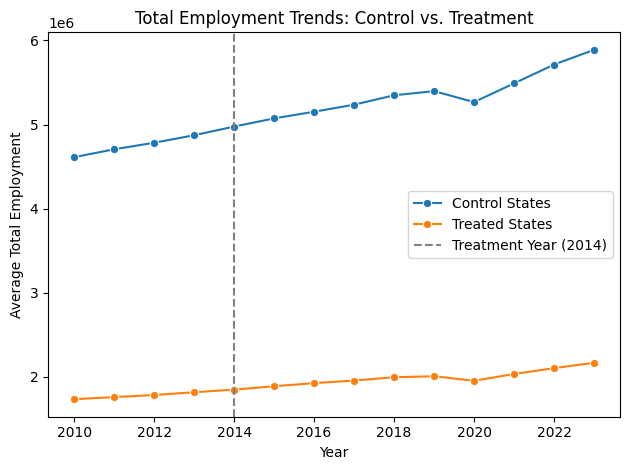

In [32]:
# get the average per year
trend_df = (
    combined_df.groupby(["year", "treated"])["total_employment"].mean().reset_index()
)

# get labels for the plots
trend_df["group"] = trend_df["treated"].map({1: "Treated States", 0: "Control States"})

# plot!
plt.figure()
sns.lineplot(data=trend_df, x="year", y="total_employment", hue="group", marker="o")

plt.axvline(x=2014, color="gray", linestyle="--", label="Treatment Year (2014)")
plt.title("Total Employment Trends: Control vs. Treatment")
plt.ylabel("Average Total Employment")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

> maybe lets try log(employment)?

In [33]:
combined_df["log_emp"] = np.log(combined_df["total_employment"])
model = smf.ols("log_emp ~ treated + post + treated:post", data=combined_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_emp   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     19.92
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           2.77e-11
Time:                        13:35:24   Log-Likelihood:                -239.24
No. Observations:                 196   AIC:                             486.5
Df Residuals:                     192   BIC:                             499.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       15.0393      0.138    108.899   

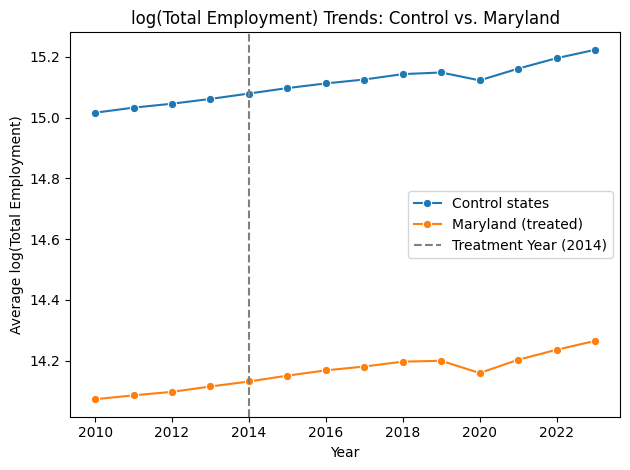

In [34]:
# get the average per year
trend_df = combined_df.groupby(["year", "treated"])["log_emp"].mean().reset_index()

# get labels for the plots
trend_df["group"] = trend_df["treated"].map(
    {1: "Maryland (treated)", 0: "Control states"}
)

# plot!
plt.figure()
sns.lineplot(data=trend_df, x="year", y="log_emp", hue="group", marker="o")

plt.axvline(x=2014, color="gray", linestyle="--", label="Treatment Year (2014)")
plt.title("log(Total Employment) Trends: Control vs. Maryland")
plt.ylabel("Average log(Total Employment)")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

two way fixed effects, states and years
more treatment
share below povery line

> Lets see each control state plotted individually

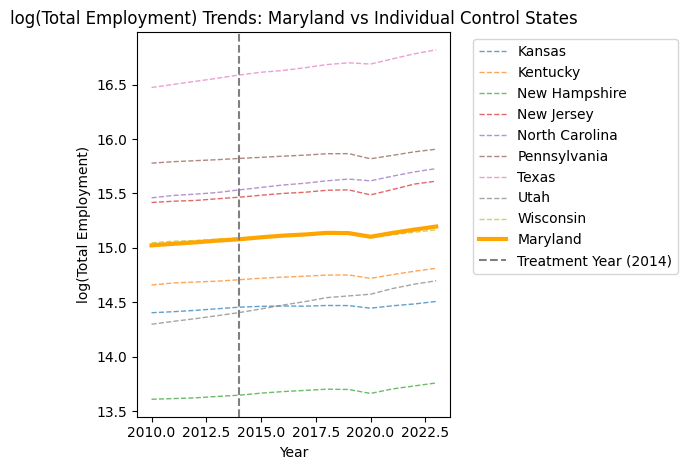

In [35]:
plt.figure()

# plot control states individually
for state in combined_df.query("treated == 0")["state"].unique():
    state_data = combined_df[(combined_df["state"] == state)]
    sns.lineplot(
        data=state_data,
        x="year",
        y="log_emp",
        label=state,
        linewidth=1,
        linestyle="--",
        alpha=0.7,
    )

# plot maryland
sns.lineplot(
    data=combined_df[combined_df["state"] == "Maryland"],
    x="year",
    y="log_emp",
    label="Maryland",
    color="orange",
    linewidth=3,
)

# add treatment line
plt.axvline(x=2014, color="gray", linestyle="--", label="Treatment Year (2014)")

plt.title("log(Total Employment) Trends: Maryland vs Individual Control States")
plt.ylabel("log(Total Employment)")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

> lowkey maybe texas and new hampshire need to go

# Real per capita personal income
adjusted for inflation

In [36]:
# just get real per capita personal income
real_percap_income_df = control_long[
    control_long["Description"].str.contains(
        "Real per capita personal income 4/", case=False, na=False
    )
].copy()

# rename so easier to understand
real_percap_income_df.rename(
    columns={"GeoName": "state", "value": "Real_per_capita_personal_income"},
    inplace=True,
)

real_percap_income_df.head()

,state,Description,Unit,year,Real_per_capita_personal_income
7,Kansas,Real per capita personal income 4/,Constant 2017 dollars,2010,47376.0
22,Kentucky,Real per capita personal income 4/,Constant 2017 dollars,2010,40634.0
37,New Hampshire,Real per capita personal income 4/,Constant 2017 dollars,2010,49949.0
52,North Carolina,Real per capita personal income 4/,Constant 2017 dollars,2010,42732.0
67,Pennsylvania,Real per capita personal income 4/,Constant 2017 dollars,2010,47012.0


> now we can merge with long_minwage_df

In [37]:
print(long_minwage_df.shape)
print(real_percap_income_df.shape)

(210, 3)
(210, 5)


In [38]:
percap_combined_df = pd.merge(
    long_minwage_df, real_percap_income_df, on=["state", "year"], how="inner"
)

In [39]:
treated_states = ["Arizona", "Delaware", "Hawaii", "Maine", "Maryland", "NewJersey"]

percap_combined_df["treated"] = percap_combined_df["state"].apply(
    lambda x: 1 if x in treated_states else 0
)
percap_combined_df["post"] = percap_combined_df["year"].apply(
    lambda x: 1 if x >= 2014 else 0
)

percap_combined_df["state"].value_counts()

state
Arizona           15
Delaware          15
Hawaii            15
Kansas            15
Kentucky          15
Maine             15
Maryland          15
New Hampshire     15
New Jersey        15
North Carolina    15
Pennsylvania      15
Texas             15
Utah              15
Wisconsin         15
Name: count, dtype: int64

In [40]:
percap_combined_df["Real_per_capita_personal_income"].dtype

dtype('O')

> similar issue as before, no data for 2024

In [41]:
# when i tried to run the regression below there was issues cuz of datatypes

# some arent numeric, lets force them to be
percap_combined_df["Real_per_capita_personal_income"] = pd.to_numeric(
    percap_combined_df["Real_per_capita_personal_income"], errors="coerce"
)

# 9 that are NA, also 9 states total in our dataset
print(percap_combined_df["Real_per_capita_personal_income"].isna().sum())

nan_rows = percap_combined_df[
    percap_combined_df["Real_per_capita_personal_income"].isna()
]
print(nan_rows)

14
              state  year min_wage                          Description  \
196         Arizona  2024    14.35   Real per capita personal income 4/   
197        Delaware  2024    13.25   Real per capita personal income 4/   
198          Hawaii  2024     14.0   Real per capita personal income 4/   
199          Kansas  2024     7.25   Real per capita personal income 4/   
200        Kentucky  2024     7.25   Real per capita personal income 4/   
201           Maine  2024    14.15   Real per capita personal income 4/   
202        Maryland  2024     15.0   Real per capita personal income 4/   
203   New Hampshire  2024     7.25   Real per capita personal income 4/   
204      New Jersey  2024    15.13   Real per capita personal income 4/   
205  North Carolina  2024     7.25   Real per capita personal income 4/   
206    Pennsylvania  2024     7.25   Real per capita personal income 4/   
207           Texas  2024     7.25   Real per capita personal income 4/   
208            Utah  2

In [42]:
# drop 2024 again
percap_combined_df = percap_combined_df.dropna(
    subset=["Real_per_capita_personal_income"]
)

percap_combined_df.head()

,state,year,min_wage,Description,Unit,Real_per_capita_personal_income,treated,post
0,Arizona,2010,7.25,Real per capita personal income 4/,Constant 2017 dollars,37167.0,1,0
1,Delaware,2010,7.25,Real per capita personal income 4/,Constant 2017 dollars,44778.0,1,0
2,Hawaii,2010,7.25,Real per capita personal income 4/,Constant 2017 dollars,41968.0,1,0
3,Kansas,2010,7.25,Real per capita personal income 4/,Constant 2017 dollars,47376.0,0,0
4,Kentucky,2010,7.25,Real per capita personal income 4/,Constant 2017 dollars,40634.0,0,0


### fit the model

In [43]:
model = smf.ols(
    "Real_per_capita_personal_income ~ treated + post + treated:post",
    data=percap_combined_df,
).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Real_per_capita_personal_income   R-squared:                       0.294
Model:                                         OLS   Adj. R-squared:                  0.283
Method:                              Least Squares   F-statistic:                     26.71
Date:                             Wed, 23 Apr 2025   Prob (F-statistic):           1.75e-14
Time:                                     13:35:25   Log-Likelihood:                -1951.9
No. Observations:                              196   AIC:                             3912.
Df Residuals:                                  192   BIC:                             3925.
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]

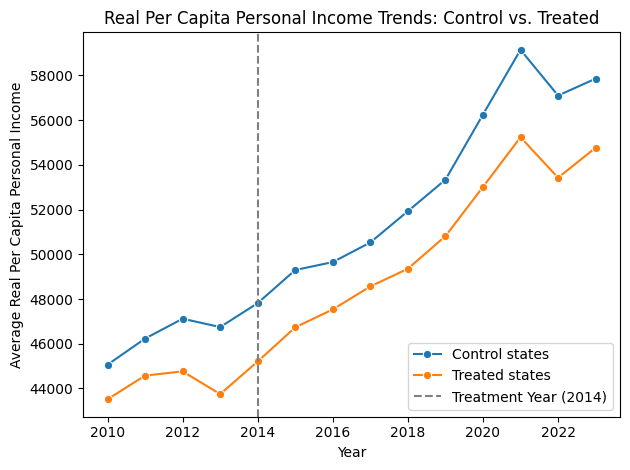

In [44]:
# get the average per year
trend_df = (
    gdp.groupby(["year", "treated"])["Real_per_capita_personal_income"]
    .mean()
    .reset_index()
)

# get labels for the plots
trend_df["group"] = trend_df["treated"].map({1: "Treated states", 0: "Control states"})

# plot!
plt.figure()
sns.lineplot(
    data=trend_df,
    x="year",
    y="Real_per_capita_personal_income",
    hue="group",
    marker="o",
)

plt.axvline(x=2014, color="gray", linestyle="--", label="Treatment Year (2014)")
plt.title("Real Per Capita Personal Income Trends: Control vs. Treated")
plt.ylabel("Average Real Per Capita Personal Income")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

> Lets see each control state plotted individually

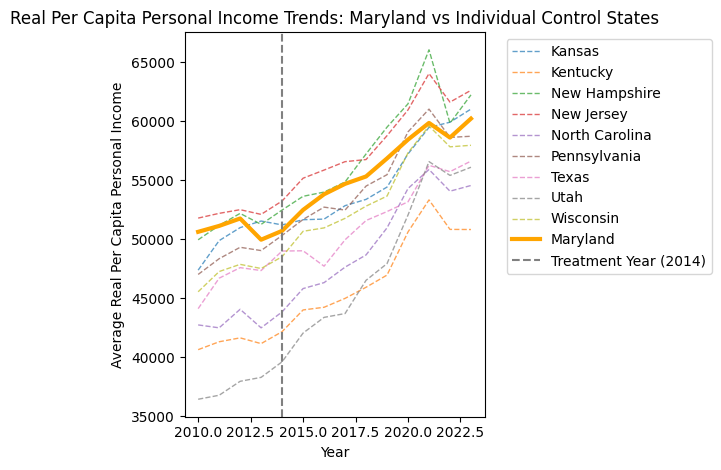

In [45]:
plt.figure()

# plot control states individually
for state in percap_combined_df.query("treated == 0")["state"].unique():
    state_data = percap_combined_df[(percap_combined_df["state"] == state)]
    sns.lineplot(
        data=state_data,
        x="year",
        y="Real_per_capita_personal_income",
        label=state,
        linewidth=1,
        linestyle="--",
        alpha=0.7,
    )

# plot maryland
sns.lineplot(
    data=percap_combined_df[percap_combined_df["state"] == "Maryland"],
    x="year",
    y="Real_per_capita_personal_income",
    label="Maryland",
    color="orange",
    linewidth=3,
)

# add treatment line
plt.axvline(x=2014, color="gray", linestyle="--", label="Treatment Year (2014)")

plt.title(
    "Real Per Capita Personal Income Trends: Maryland vs Individual Control States"
)
plt.ylabel("Average Real Per Capita Personal Income")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# GDP

In [46]:
control_long["Description"].value_counts()

Description
Real GDP (millions of chained 2017 dollars) 1/                   210
Real personal income (millions of constant (2017) dollars) 2/    210
Real PCE (millions of constant (2017) dollars) 3/                210
Gross domestic product (GDP)                                     210
Personal income                                                  210
Disposable personal income                                       210
Personal consumption expenditures                                210
Real per capita personal income 4/                               210
Real per capita PCE 5/                                           210
Per capita personal income 6/                                    210
Per capita disposable personal income 7/                         210
Per capita personal consumption expenditures (PCE) 8/            210
Regional price parities (RPPs) 9/                                210
Implicit regional price deflator 10/                             210
Total employment (numb

In [47]:
gdp_df = control_long[
    control_long["Description"].str.strip() == "Gross domestic product (GDP)"
].copy()

gdp_df.head()

,GeoName,Description,Unit,year,value
3,Kansas,Gross domestic product (GDP),Millions of current dollars,2010,129235.7
18,Kentucky,Gross domestic product (GDP),Millions of current dollars,2010,166656.3
33,New Hampshire,Gross domestic product (GDP),Millions of current dollars,2010,65310.8
48,North Carolina,Gross domestic product (GDP),Millions of current dollars,2010,422282.2
63,Pennsylvania,Gross domestic product (GDP),Millions of current dollars,2010,604629.6


In [48]:
# rename so easier to understand
gdp_df.rename(
    columns={"GeoName": "state", "value": "GDP"},
    inplace=True,
)

gdp_df.head()

,state,Description,Unit,year,GDP
3,Kansas,Gross domestic product (GDP),Millions of current dollars,2010,129235.7
18,Kentucky,Gross domestic product (GDP),Millions of current dollars,2010,166656.3
33,New Hampshire,Gross domestic product (GDP),Millions of current dollars,2010,65310.8
48,North Carolina,Gross domestic product (GDP),Millions of current dollars,2010,422282.2
63,Pennsylvania,Gross domestic product (GDP),Millions of current dollars,2010,604629.6


In [49]:
gdp_combined_df = pd.merge(long_minwage_df, gdp_df, on=["state", "year"], how="inner")

In [50]:
treated_states = ["Arizona", "Delaware", "Hawaii", "Maine", "Maryland", "NewJersey"]

gdp_combined_df["treated"] = gdp_combined_df["state"].apply(
    lambda x: 1 if x in treated_states else 0
)
gdp_combined_df["post"] = gdp_combined_df["year"].apply(lambda x: 1 if x >= 2014 else 0)

gdp_combined_df["state"].value_counts()

state
Arizona           15
Delaware          15
Hawaii            15
Kansas            15
Kentucky          15
Maine             15
Maryland          15
New Hampshire     15
New Jersey        15
North Carolina    15
Pennsylvania      15
Texas             15
Utah              15
Wisconsin         15
Name: count, dtype: int64

In [51]:
# when i tried to run the regression below there was issues cuz of datatypes

# some arent numeric, lets force them to be
gdp_combined_df["GDP"] = pd.to_numeric(gdp_combined_df["GDP"], errors="coerce")

# 9 that are NA, also 9 states total in our dataset
print(gdp_combined_df["GDP"].isna().sum())

nan_rows = gdp_combined_df[gdp_combined_df["GDP"].isna()]
print(nan_rows)

0
Empty DataFrame
Columns: [state, year, min_wage, Description, Unit, GDP, treated, post]
Index: []


In [52]:
model = smf.ols(
    "GDP ~ treated + post + treated:post",
    data=gdp_combined_df,
).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     10.43
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           2.04e-06
Time:                        13:35:25   Log-Likelihood:                -3023.7
No. Observations:                 210   AIC:                             6055.
Df Residuals:                     206   BIC:                             6069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.172e+05   7.29e+04      5.718   

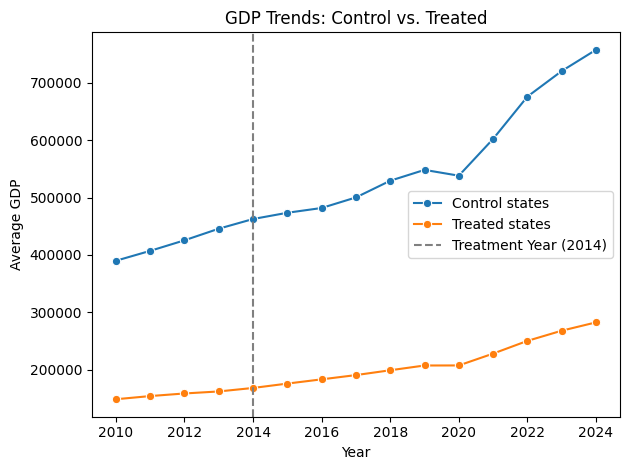

In [53]:
# get the average per year
trend_df = gdp_combined_df.groupby(["year", "treated"])["GDP"].mean().reset_index()

# get labels for the plots
trend_df["group"] = trend_df["treated"].map({1: "Treated states", 0: "Control states"})

# plot!
plt.figure()
sns.lineplot(
    data=trend_df,
    x="year",
    y="GDP",
    hue="group",
    marker="o",
)

plt.axvline(x=2014, color="gray", linestyle="--", label="Treatment Year (2014)")
plt.title("GDP Trends: Control vs. Treated")
plt.ylabel("Average GDP")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()